In [130]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
%matplotlib notebook


In [64]:

# CURATE DATA

data_path = 'data/20k_data.csv'
label_path = 'data/20k_labels.csv'

data = pd.read_csv(data_path, low_memory=False)
label = pd.read_csv(label_path, low_memory=False)

headers = ['x', 'y', 'z']
num_objs = (data.shape[1] - 3) // 2

dists = []
heights = []
for i in range(num_objs):
    dists.append('dist_' + str(i))
    heights.append('height_' + str(i))
    headers.append('dist_' + str(i))
    headers.append('height_' + str(i))
    
data.columns = headers
data = data.replace(to_replace='None', value=0).astype('float')


In [121]:

# CURATE ONLY MAX HEIGHT DATA

h_col = data[heights].idxmax(axis=1)
h_ind = [data.columns.get_loc(c) for c in h_col]

data_mh_list = [data.iloc[i, [0, 1, 2, col-1, col]].tolist() for i in range(len(h_ind))]
mh_headers = ['x', 'y', 'z', 'dist', 'height']
mh = pd.DataFrame(data_mh_list, columns=mh_headers)
mhl = label.join(mh)


<IPython.core.display.Javascript object>


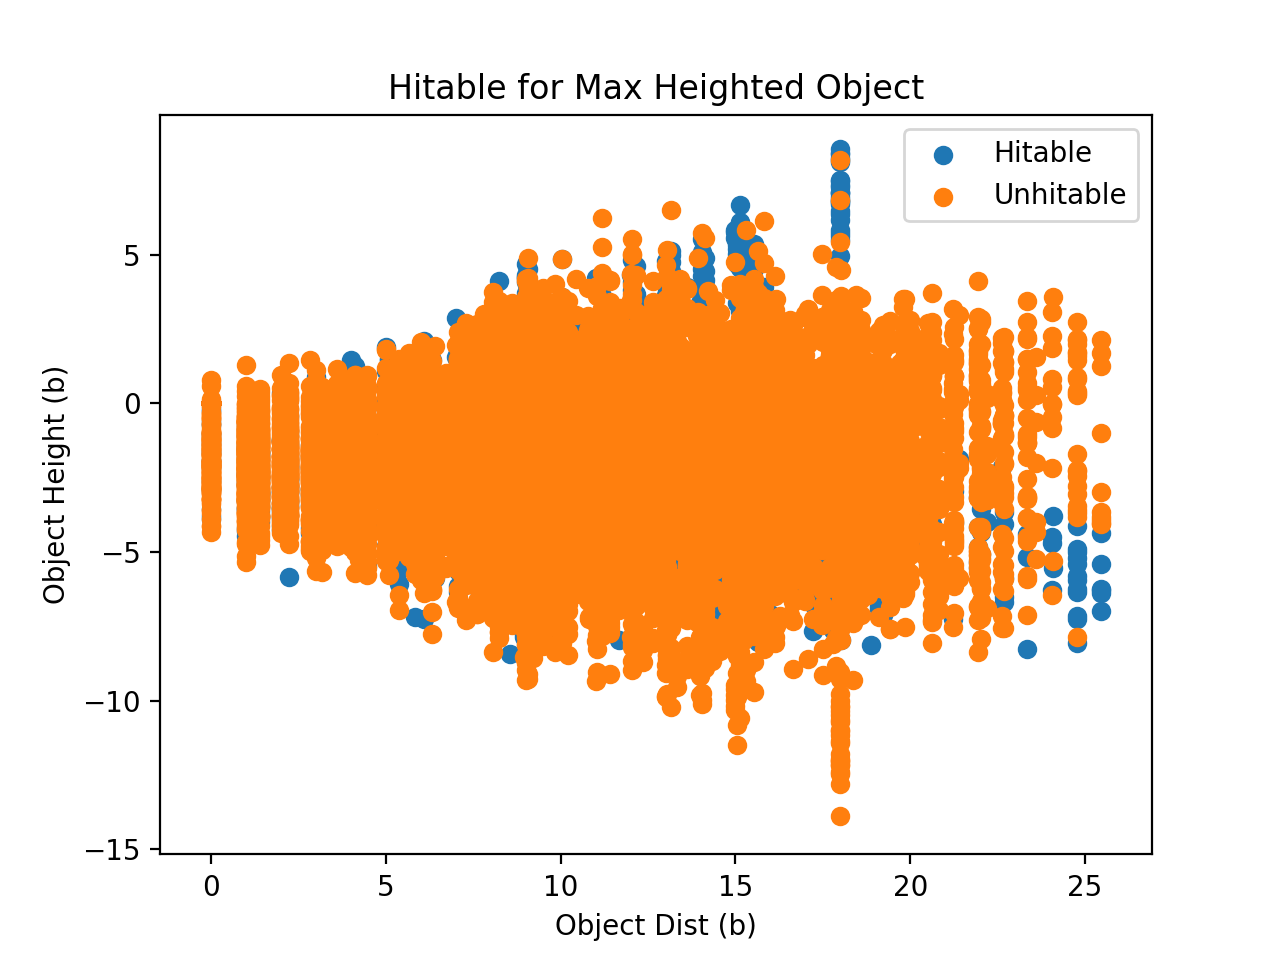

In [154]:

# CAN DETERMINE HITABLE FROM MAX HEIGHTED OBJECT

groups = mh_labeled.groupby(lambda x: 'Hitable' if mhl.iloc[x]['f'] == 0 else 'Unhitable')

plt.figure(0)
for name, group in groups:
    plt.scatter(group['dist'], group['height'], label=name)    
plt.title('Hitable for Max Heighted Object')
plt.xlabel('Object Dist (b)')
plt.ylabel('Object Height (b)')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


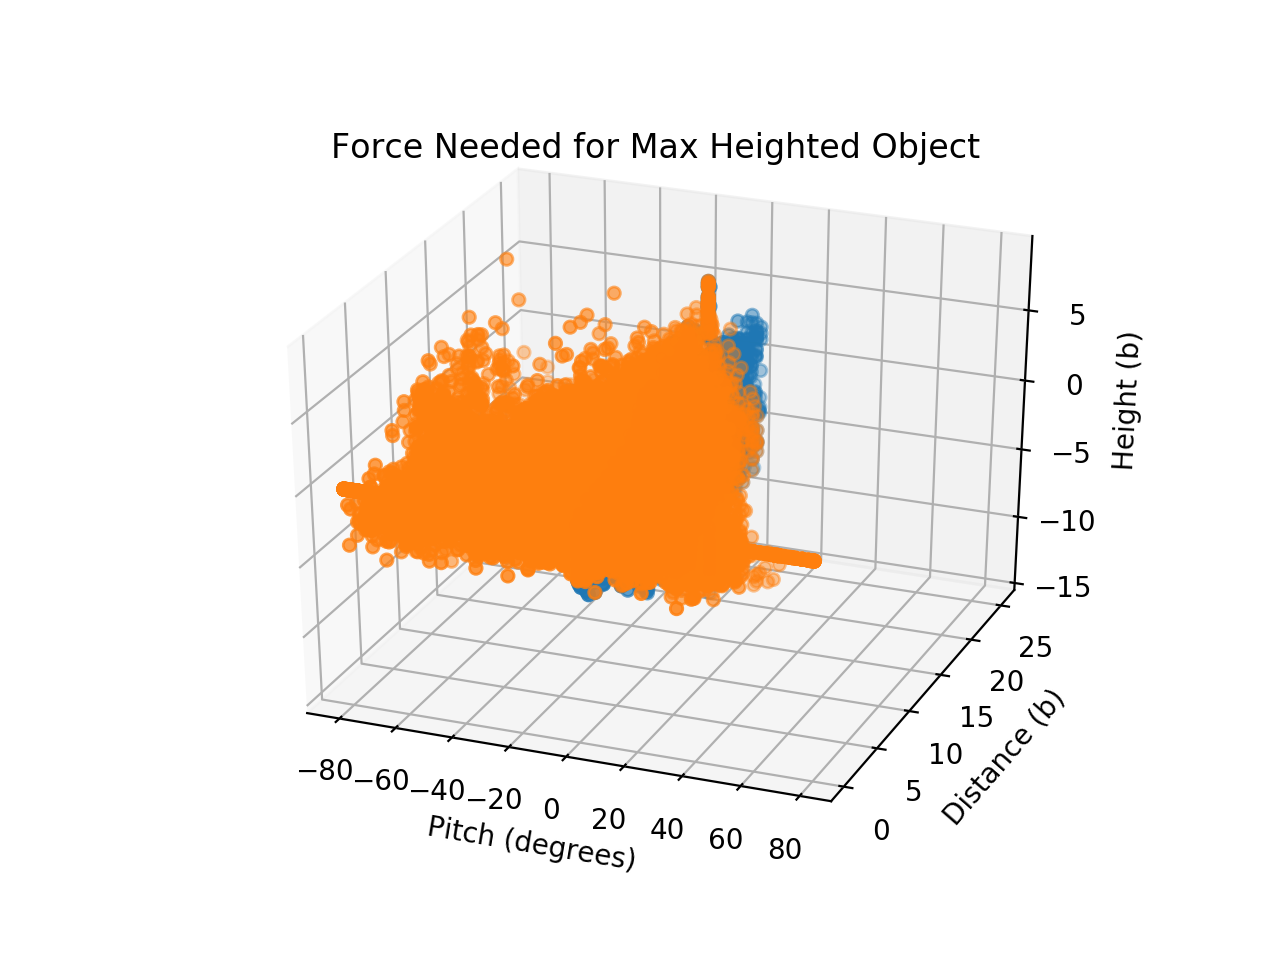

In [131]:

# FORCE PLOT MAX HEIGHTED OBJECT

figure = plt.figure(1).gca(projection='3d')
figure.scatter(mhl['f'], mhl['dist'], mhl['height'])
figure.set_title('Force Needed for Max Heighted Object')
figure.set_xlabel('Force (f)')
figure.set_ylabel('Distance (b)')
figure.set_zlabel('Height (b)')
plt.show()


<IPython.core.display.Javascript object>


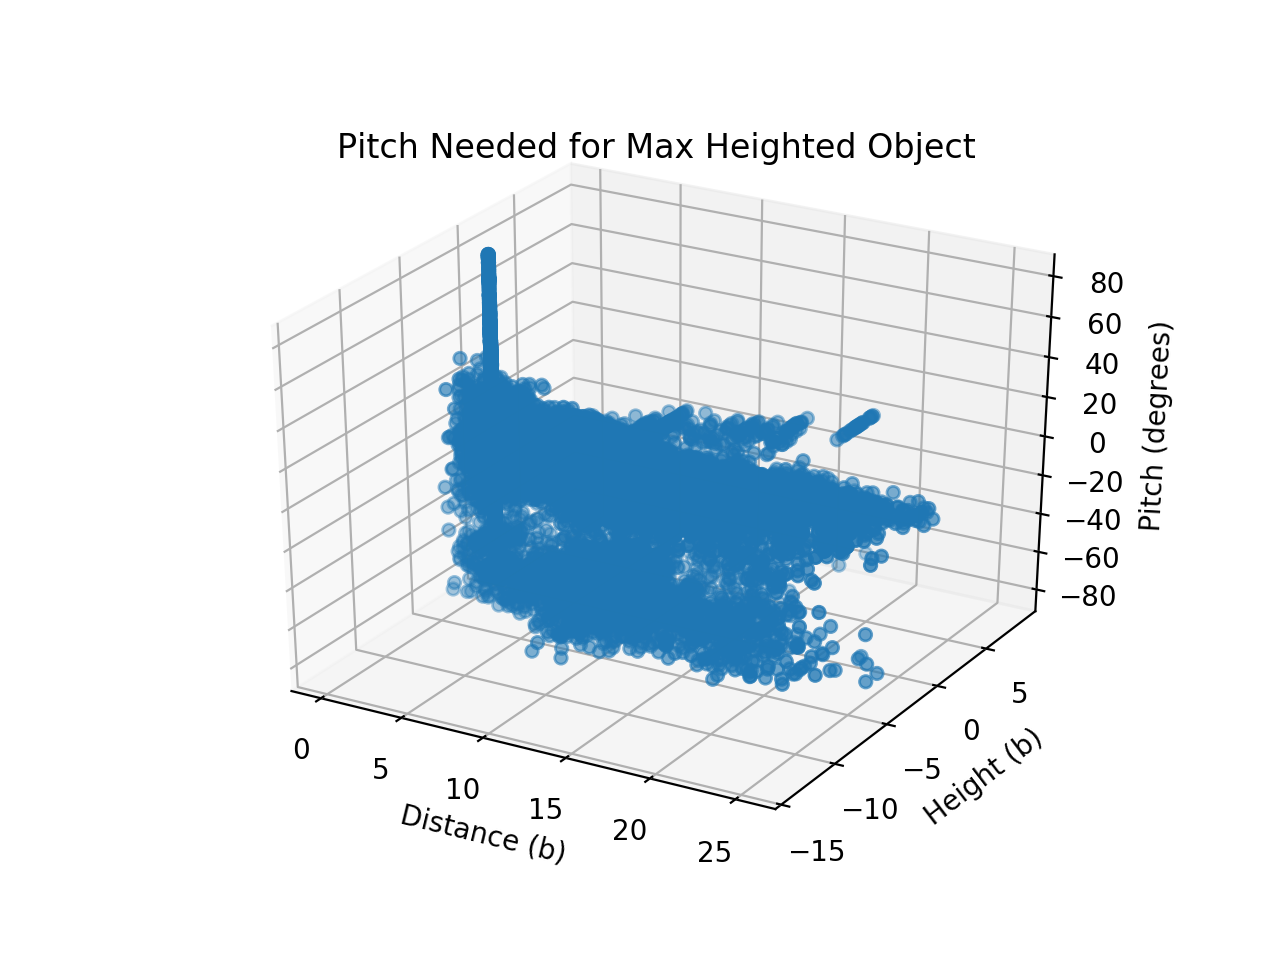

<IPython.core.display.Javascript object>


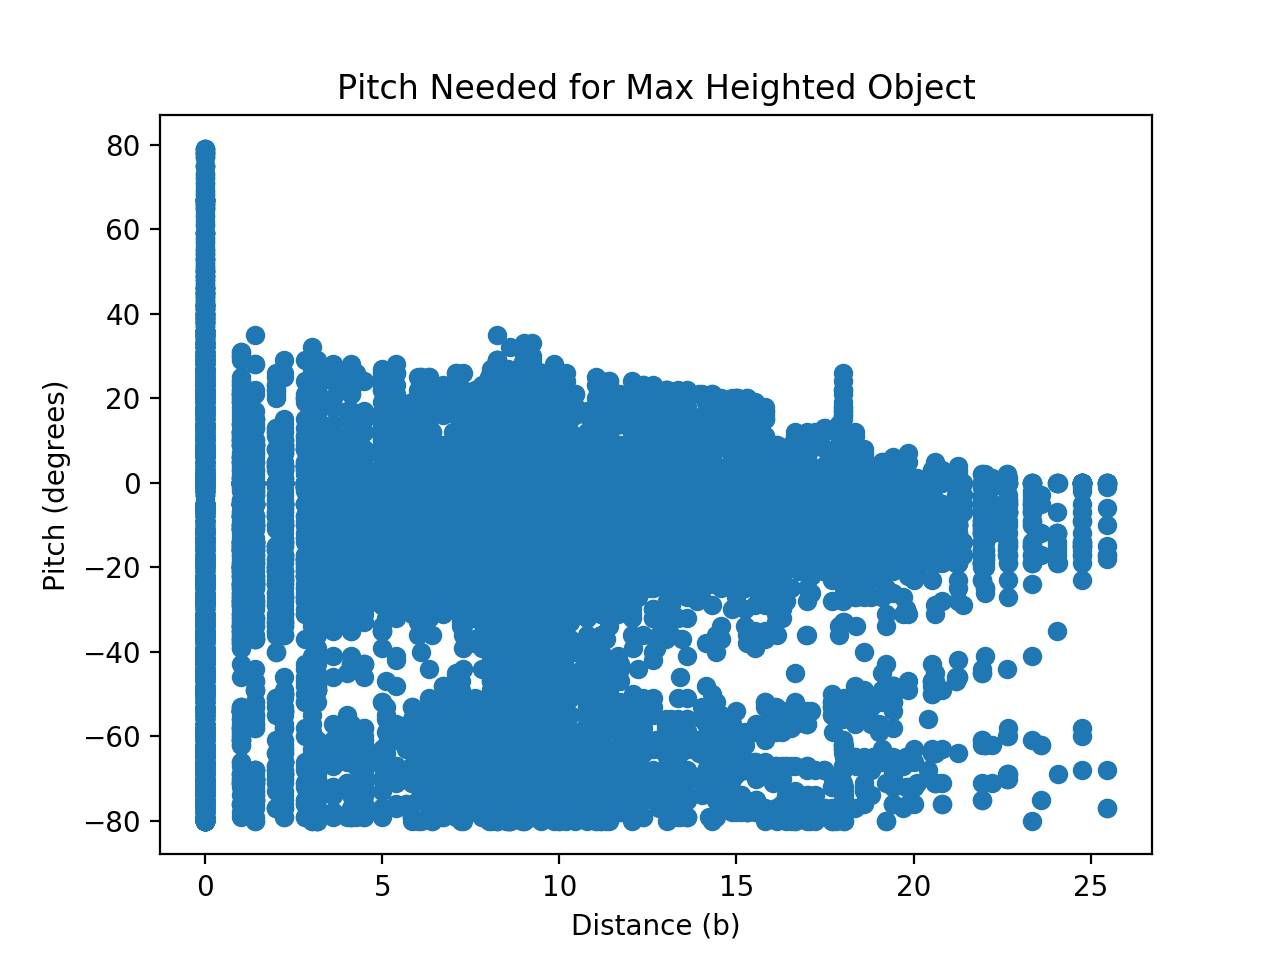

In [142]:

# PITCH PLOT MAX HEIGHTED OBJECT

figure = plt.figure(2).gca(projection='3d')
figure.scatter(mhl['dist'], mhl['height'], mhl['pitch'])
figure.set_title('Pitch Needed for Max Heighted Object')
figure.set_xlabel('Distance (b)')
figure.set_ylabel('Height (b)')
figure.set_zlabel('Pitch (degrees)')

figure = plt.figure(3)
plt.scatter(mhl['dist'], mhl['pitch'])
plt.title('Pitch needed for Max Heighted Object')
plt.xlabel('Distance (b)')
plt.ylabel('Pitch (degrees)')
plt.show()


<IPython.core.display.Javascript object>


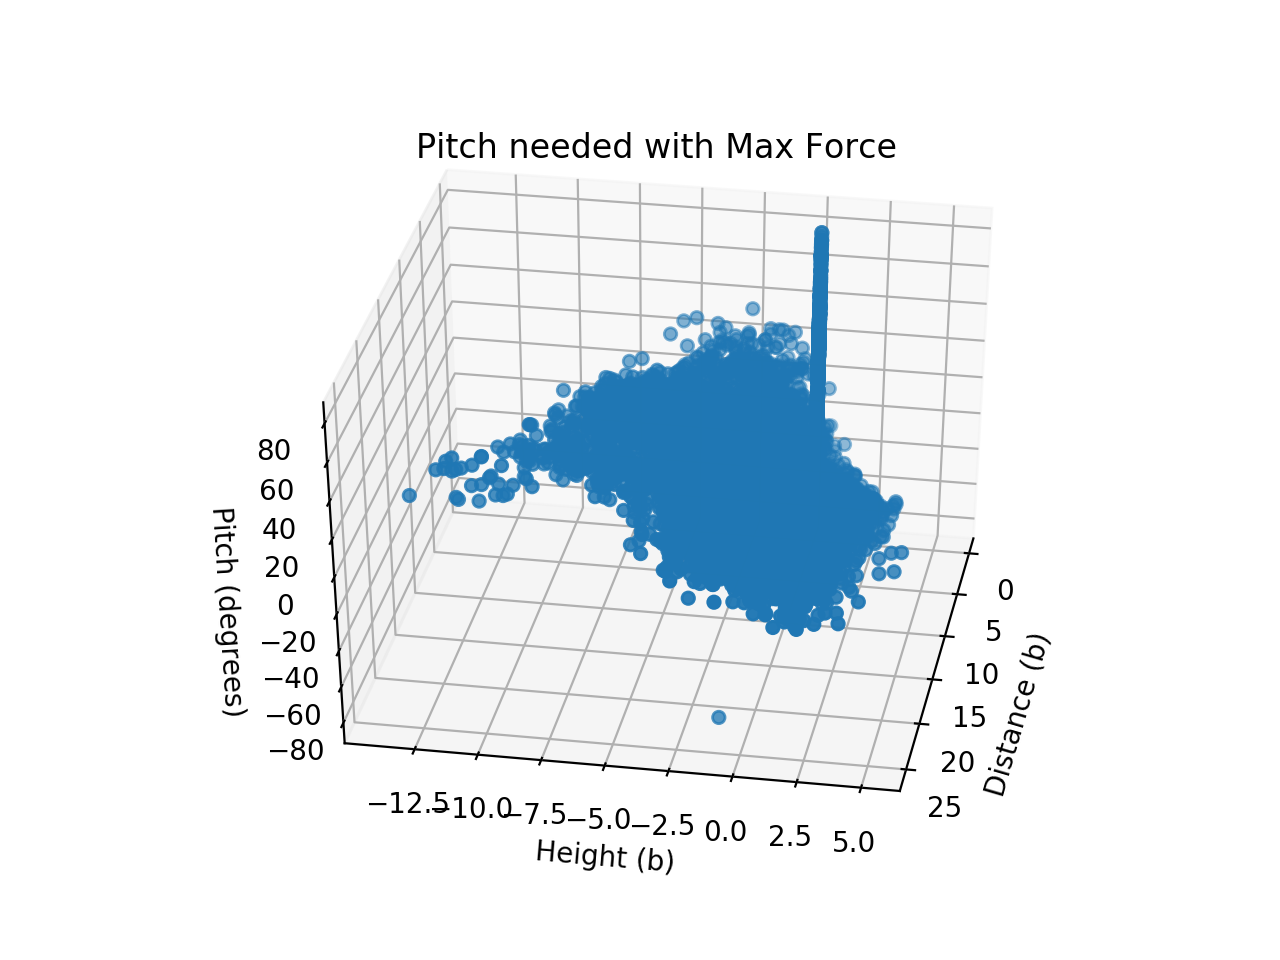

Text(0.5,0,'Pitch (degrees)')

In [153]:

# DETERMINE PITCH FROM MAX FORCE MAX HEIGHTED OBJECT

mf = mhl.groupby('f').get_group(1.0)

figure = plt.figure(4).gca(projection='3d')
figure.scatter(mf['dist'], mf['height'], mf['pitch'])
figure.set_title('Pitch needed with Max Force')
figure.set_xlabel('Distance (b)')
figure.set_ylabel('Height (b)')
figure.set_zlabel('Pitch (degrees)')
